In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기

In [3]:
#압축풀기
import zipfile

local_zip = '/content/drive/MyDrive/데이터저장/와인품질분류.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/')
zip_ref.close()

In [4]:
df=pd.read_csv('/content/data/train.csv')
df

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [5]:
set(df['quality'])

{3, 4, 5, 6, 7, 8, 9}

In [6]:
df2=pd.read_csv('/content/data/test.csv')
df2

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


# 결측치 확인 

In [7]:
df.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


# 필요없는 행/열 삭제

In [9]:
df.drop('index', axis=1, inplace=True)
df

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


# x,y 데이터 분리

In [10]:
X_data=df.drop('quality', axis=1)
y_data=df['quality']

In [11]:
X_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,white
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,white
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,white
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,white


In [12]:
y_data

0       5
1       5
2       5
3       6
4       6
       ..
5492    5
5493    6
5494    7
5495    5
5496    6
Name: quality, Length: 5497, dtype: int64

In [13]:
set(y_data)

{3, 4, 5, 6, 7, 8, 9}

# 점검 및 탐색(시각화)

In [14]:
df.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


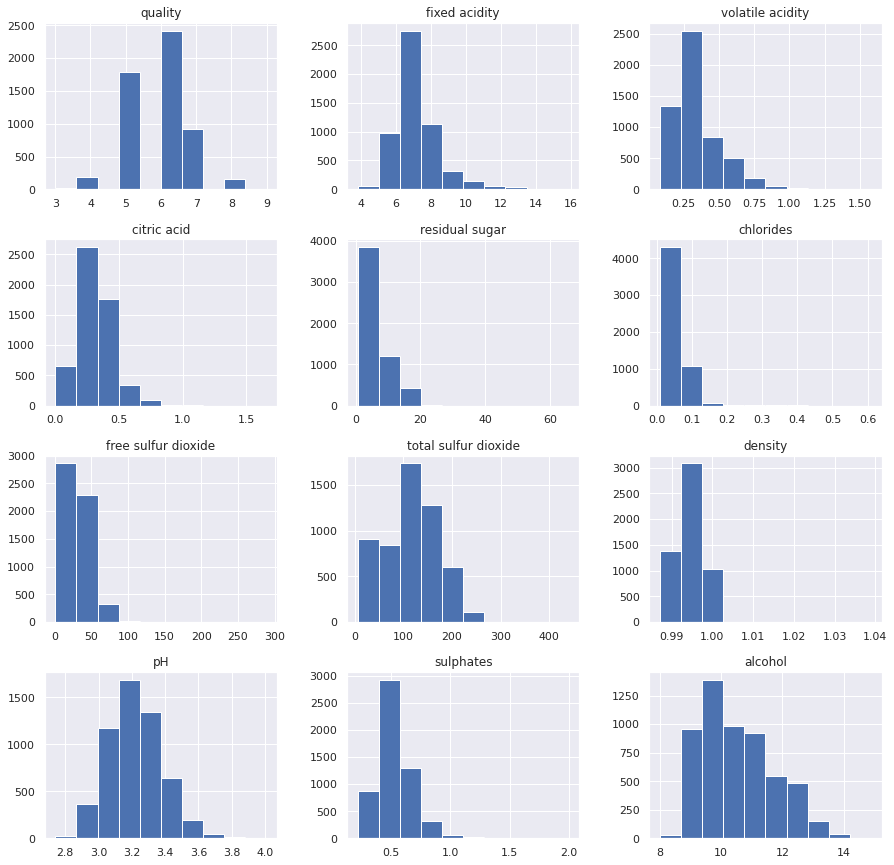

In [ ]:
X_data.hist(figsize=(15,15), bins=10)
plt.show()
#품질, 산도, 휘발성산, 시트르산, 잔당 : 발효 후 와인 속에 남아있는 당분, 염화물, 독립 이산화황, 총 이산화황, 밀도, 수소이온농도, 황산염, 도수

In [ ]:
y_data=pd.DataFrame(y_data, columns=['quality'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1fb3d50250>]],
      dtype=object)

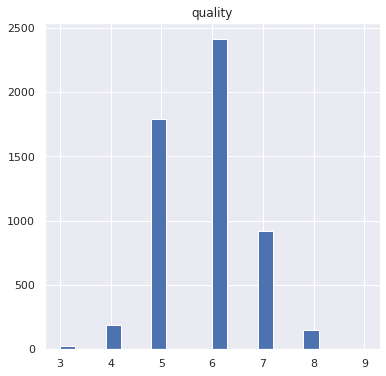

In [ ]:
y_data.hist(figsize=(6,6), bins=20)

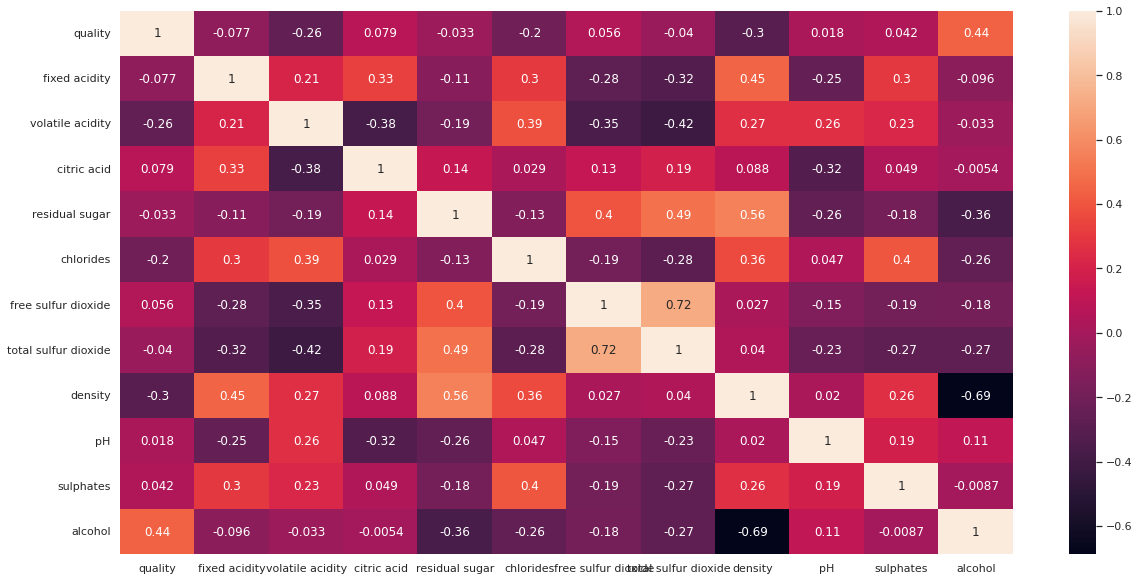

In [ ]:
#각 데이터끼리의 관계 보기

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='rocket')

plt.xticks(rotation=360)
plt.show()

# encoding

In [15]:
set(X_data['type'])

{'red', 'white'}

In [16]:
#one hot 인코딩
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)

color=enc.fit_transform(X_data[['type']])
color

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [17]:
X_data['type']=color
X_data
#white 0 red 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.0
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1.0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.0
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.0
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1,0.0
5493,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,0.0
5494,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3,0.0
5495,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5,0.0


In [18]:
X_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.243405
std,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000


# 데이터 분리

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4397, 12), (1100, 12), (4397,), (1100,))

# 전처리

In [21]:
#스케일링
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()

log_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [32]:
# 기울기와 절편 출력하기
log_model.coef_, log_model.intercept_

(array([[ 5.28999846e-01,  9.26192918e-01, -2.11445632e-01,
         -1.11129358e-01,  5.55141641e-01,  4.92251602e-01,
         -1.17173153e-01,  6.81907170e-02,  8.77584152e-02,
         -3.65368998e-01, -5.44163056e-01, -7.05286951e-01],
        [-4.03737114e-01,  8.13746582e-01, -1.53754740e-02,
         -9.10536653e-01,  1.19827922e-01, -9.64370103e-01,
          1.07286369e-01,  8.21809977e-01, -2.48210579e-01,
         -1.90939224e-01, -5.72576359e-01, -1.08506398e+00],
        [-6.19458442e-01,  2.23668990e-01,  1.03478391e-01,
         -5.94479127e-01,  1.89719467e-01, -2.52456684e-01,
          4.05310310e-01,  6.43558221e-01, -4.49780693e-01,
         -1.54695610e-01, -7.51613791e-01,  4.32905246e-01],
        [-5.81000223e-01, -4.62558755e-01, -7.75531034e-03,
         -2.42944984e-01,  2.04192802e-01, -5.56343277e-02,
          8.33440341e-02,  5.05865829e-01, -3.50964318e-01,
          1.22235920e-01,  1.48445697e-01,  4.59544216e-01],
        [ 1.35147271e-01, -7.8872231

In [33]:
#스코어
print('train score : {:.3f}'.format(log_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(log_model.score(X_test, y_test)))

train score : 0.553
test socre : 0.521


In [ ]:
#y 예측값
y_pred_test=log_model.predict(X_test)

In [37]:
#rmse
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred_test)
mse=np.sqrt(mse)
mse

0.8140806303599618

In [ ]:
#gridsearch 사용
from sklearn.model_selection import GridSearchCV

log_model=LogisticRegression()

params = {'penalty':['5','l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}

gs=GridSearchCV(log_model,
                param_grid=params,
                cv=3,
                scoring='accuracy',
                n_jobs=4,
                verbose=1
                )
gs.fit(X_train,y_train)

In [ ]:
log_best=gs.best_estimator_
print(log_best)

print(gs.best_score_)

LogisticRegression(C=10)
0.5476465411674869


In [38]:
acc_log_test=round(log_best.score(X_test,y_test)*100,2)
acc_log_test

51.91

# SVM

In [160]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm=SVC()

svm_param=[{'kernel':['poly'], 'C':[10,30,100,300,1000]},
           {'kernel':['rbf'], 'C':[1.0, 3.0, 10., 30., 100.], 'gamma':[0.01, 0.03, 0.1, 1.0]}
           ]

gs=GridSearchCV(svm,
                param_grid=svm_param,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=2
                )
gs.fit(X_train,y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


GridSearchCV(cv=2, estimator=SVC(), n_jobs=4,
             param_grid=[{'C': [10, 30, 100, 300, 1000], 'kernel': ['poly']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0],
                          'gamma': [0.01, 0.03, 0.1, 1.0], 'kernel': ['rbf']}],
             scoring='accuracy', verbose=2)

In [65]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm=SVC()

svm_param={'kernel':['rbf'],
           'C':[10,100,1000,10000,],
           'gamma':[0.01,0.1,1.0,10.,100.]}

gs=GridSearchCV(svm,
                param_grid=svm_param,
                cv=3,
                scoring='accuracy',
                n_jobs=4,
                verbose=2
                )
gs.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=4,
             param_grid={'C': [10, 100, 1000, 10000],
                         'gamma': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [161]:
svm_best=gs.best_estimator_
print(svm_best)

print(gs.best_score_)

SVC(C=3.0, gamma=1.0)
0.5769853200706252


In [164]:
svm_best.fit(X_train,y_train)

#스코어
print('train score : {:.3f}'.format(svm_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(svm_best.score(X_test, y_test)))

train score : 0.980
test socre : 0.652


In [68]:
y_pred_test=svm_best.predict(X_test)

In [69]:
#rmse
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test,y_pred_test)
mse=np.sqrt(mse)
mse

0.7128687243678307

In [162]:
acc_svm_test=round(svm_best.score(X_test,y_test)*100,2)
acc_svm_test

65.18

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

model_dt=DecisionTreeClassifier(criterion='entropy',
                                max_depth=5,
                                random_state=0)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [51]:
print('train score : {:.3f}'.format(model_dt.score(X_train, y_train)))
print('test socre : {:.3f}'.format(model_dt.score(X_test, y_test)))

train score : 0.566
test socre : 0.534


In [52]:
#grid search 사용해보기

DTC = DecisionTreeClassifier(random_state=41, )

param={'criterion':['gini','entropy'],
       'max_depth':[2,3,4,5,6,7,8,9],
       'min_samples_leaf':[1,2,3,4,5,7,9]
       }
gs=GridSearchCV(DTC,
                param_grid=param,
                scoring='accuracy',
                n_jobs=4,
                verbose=2
                )
gs.fit(X_train,y_train)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=DecisionTreeClassifier(random_state=41), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 7, 9]},
             scoring='accuracy', verbose=2)

In [53]:
dt_best=gs.best_estimator_
print(dt_best)

print(gs.best_score_)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=9, random_state=41)
0.5503813734615782


In [54]:
#스코어
print('train score : {:.3f}'.format(dt_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(dt_best.score(X_test, y_test)))

train score : 0.662
test socre : 0.546


In [55]:
y_pred_test=dt_best.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_test, y_pred_test)
mse=np.sqrt(mse)
mse

0.833939173713854

In [126]:
acc_dt_test=round(dt_best.score(X_test,y_test)*100,2)
acc_dt_test

54.64

# Random Forest

In [178]:
from sklearn.ensemble import RandomForestClassifier

forest_model=RandomForestClassifier(100,
                                    max_depth=6,
                                    max_features=3)
forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, max_features=3)

In [179]:
print('train score : {:.3f}'.format(forest_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(forest_model.score(X_test, y_test)))

train score : 0.625
test socre : 0.564


In [74]:
#grid search

rf=RandomForestClassifier(random_state=0,)

param={'n_estimators':[100,200,300,400],
       'max_features':[1,2,3],
       'max_depth':[1,2,3,4,5,6],
       }
gs=GridSearchCV(rf,
                param_grid=param,
                scoring='accuracy',
                cv=3,
                n_jobs=4,
                verbose=1
                )
gs.fit(X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=4,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=1)

In [175]:
#최적의 파라미터 조합 출력
rf_best=gs.best_estimator_
print(rf_best)

print(gs.best_score_)#최고 점수

SVC(C=3.0, gamma=1.0)
0.5769853200706252


In [176]:
print('train score : {:.3f}'.format(rf_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(rf_best.score(X_test, y_test)))

train score : 0.980
test socre : 0.652


In [177]:
acc_rf_test=round(rf_best.score(X_test,y_test)*100,2)
acc_rf_test

65.18

# Ada Boost

In [78]:
from sklearn.ensemble import AdaBoostClassifier

ada_model=AdaBoostClassifier(n_estimators=9, learning_rate=0.5)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=9)

In [79]:
print('train score : {:.3f}'.format(ada_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(ada_model.score(X_test, y_test)))

train score : 0.451
test socre : 0.459


In [84]:
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=7)

ada_param_grid={'algorithm':['SAMME', 'SAMME.R'],
                'base_estimator__max_depth':[1,3,5,7,9],
                'learning_rate':[0.1, 0.2, 0.3, 1.5,3.,10.],
                'n_estimators':[30,50,100]}
gs=GridSearchCV(ADA,
                param_grid=ada_param_grid,
                cv=2,
                scoring='accuracy',
                n_jobs=4,
                verbose=1)

gs.fit(X_train, y_train)

Fitting 2 folds for each of 180 candidates, totalling 360 fits


GridSearchCV(cv=2,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=7),
             n_jobs=4,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'base_estimator__max_depth': [1, 3, 5, 7, 9],
                         'learning_rate': [0.1, 0.2, 0.3, 1.5, 3.0, 10.0],
                         'n_estimators': [30, 50, 100]},
             scoring='accuracy', verbose=1)

In [85]:
ada_best=gs.best_estimator_
print(ada_best)

print(gs.best_score_)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9),
                   learning_rate=0.1, n_estimators=100, random_state=7)
0.6035933903283857


In [139]:
ada_best.fit(X_train,y_train)

print('train score : {:.3f}'.format(ada_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(ada_best.score(X_test, y_test)))

train score : 1.000
test socre : 0.685


In [140]:
acc_ada_test=round(ada_best.score(X_test,y_test)*100,2)
acc_ada_test

68.45

# KNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier 

kn_model=KNeighborsClassifier()

kn_model.fit(X_train,y_train)

print('train score : {:.3f}'.format(kn_model.score(X_train, y_train)))
print('test socre : {:.3f}'.format(kn_model.score(X_test, y_test)))

train score : 0.697
test socre : 0.555


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors":range(1,20),
    "knn__p":[1,2,3,4]
}
gs = GridSearchCV(pipeline,
                 param_grid=param_grid,
                 cv=2)

gs.fit(X_train,y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 20),
                         'knn__p': [1, 2, 3, 4]})

In [120]:
knn_best=gs.best_estimator_
print(knn_best)

print(gs.best_score_)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=19))])
0.5360490395791618


In [121]:
gs.best_params_

{'knn__n_neighbors': 19, 'knn__p': 2}

In [122]:
knn_best.fit(X_train,y_train)

print('train score : {:.3f}'.format(knn_best.score(X_train, y_train)))
print('test socre : {:.3f}'.format(knn_best.score(X_test, y_test)))

train score : 0.601
test socre : 0.536


In [123]:
acc_knn_test=round(knn_best.score(X_test,y_test)*100,2)
acc_knn_test

53.64

# 점수 종합

In [165]:
models=pd.DataFrame(
                     {
                     'Model':['Logistic Regreesion', 'SVM', 'Decision Tree', 'Random Forest', 'Ada Boost', 'KNN'],
                     'Score': [acc_log_test, acc_svm_test, acc_dt_test, acc_rf_test, acc_ada_test, acc_knn_test]
                     }
                    )
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Ada Boost,68.45
1,SVM,65.18
3,Random Forest,55.45
2,Decision Tree,54.64
5,KNN,53.64
0,Logistic Regreesion,51.91


# 실제 적용해보기

In [128]:
df2=pd.read_csv('/content/data/test.csv')
df2

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,red
996,996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,white
997,997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,red
998,998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,red


In [145]:
df2.drop('index', axis=1, inplace=True)

In [147]:
df2_copy=df2.copy()

In [133]:
df2_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


## Encoding

In [148]:
#one hot 인코딩
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)

color=enc.fit_transform(df2_copy[['type']])
color

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [149]:
df2_copy['type']=color
df2_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0.0
1,13.3,0.43,0.58,1.90,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1.0
2,6.5,0.28,0.27,5.20,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0.0
3,7.2,0.15,0.39,1.80,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0.0
4,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,7.1,0.59,0.02,2.30,0.082,24.0,94.0,0.99744,3.55,0.53,9.7,1.0
996,8.7,0.15,0.30,1.60,0.046,29.0,130.0,0.99420,3.22,0.38,9.8,0.0
997,8.8,0.66,0.26,1.70,0.074,4.0,23.0,0.99710,3.15,0.74,9.2,1.0
998,7.0,0.42,0.19,2.30,0.071,18.0,36.0,0.99476,3.39,0.56,10.9,1.0


## 전처리

In [150]:
#데이터 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std=StandardScaler()

df_test=std.fit_transform(df2_copy)

## test 모델에 넣어보기

In [170]:
y_pred=ada_model.predict(df_test)

In [171]:
df_y=pd.read_csv('/content/data/sample_submission.csv')
df_y

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
995,995,0
996,996,0
997,997,0
998,998,0


In [172]:
df_y['quality']=y_pred

In [173]:
df_y

,index,quality
0,0,6
1,1,6
2,2,6
3,3,6
4,4,7
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [174]:
#csv 파일로 저장하기

df_y.to_csv('./와인품질예측(ada boost)_1.csv', index=False)

## svm

In [166]:
y_pred=svm_best.predict(df_test)

In [167]:
df_y['quality']=y_pred

In [168]:
df_y

,index,quality
0,0,5
1,1,6
2,2,6
3,3,6
4,4,6
...,...,...
995,995,5
996,996,6
997,997,5
998,998,6


In [169]:
#csv 파일로 저장하기

df_y.to_csv('./와인품질예측(svm)_1.csv', index=False)

## 랜덤포레스트

In [180]:
y_pred=forest_model.predict(df_test)

df_y['quality']=y_pred

df_y.to_csv('./와인품질예측(랜덤포레스트)_1.csv', index=False)

# 딥러닝

In [22]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.engine.sequential import Sequential
from tensorflow import keras
from keras import regularizers

In [89]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [94]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# 학습하기

In [95]:
history=model.fit(X_train,y_train, 
                  epochs=5,
                  batch_size=32,
                  validation_data=(X_test,y_test)
                  )

Epoch 1/20
138/138 [==============================] - 1s 4ms/step - loss: nan - accuracy: 6.8228e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/20
138/138 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/20
138/138 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/20
138/138 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/20
138/138 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
138/138 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/20
138/138 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0